## Atomic and Ionic Cross Sections

In this tutorial we make atomic and ionic cross sections and overplot them to see the differences. We strongly recommend reading the Quick Start [Link] guide if you have not done so yet.

Let's create a cross section for sodium. We require the usual parameters of the `species` and `database`.

In [6]:
from excalibur.core import summon

species = 'Ca'

database = 'Vald'

summon(database=database, species = species, VALD_data_dir='./VALD Line Lists/')  # Download line list
summon(database=database, species = species, ionization_state = 2, VALD_data_dir='./VALD Line Lists/')  # Download line list


 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: Ca 
Ionization State: 1

Line list ready.


 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: Ca 
Ionization State: 2

Line list ready.



In [7]:
from excalibur.core import compute_cross_section

P = 1  # Pressure in bars
T = 1000  # Temperature in Kelvin
input_directory = './input/' # Top level directory containing line lists

nu, sigma = compute_cross_section(database=database, species = species, pressure = P,
                      temperature = T, input_dir = input_directory)

nu2, sigma2 = compute_cross_section(database=database, species = species, ionization_state = 2, pressure = P,
                      temperature = T, input_dir = input_directory)

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 2.6329416250000577 s
Pre-computation steps complete
Generating cross section for Ca I at P = 1 bar, T = 1000 K
Calculation complete!
Completed 20490 transitions in 0.3091226670001106 s

Total runtime: 5.537328124999931 s
Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 0.2250453330000255 s
Pre-computation steps complete
Generating cross section for Ca II at P = 1 bar, T = 1000 K
Calculation complete!
Completed 1956 transitions in 0.00342537500000617 s

Total runtime: 2.659516457999871 s


In [9]:
from excalibur.plot import cross_section_collection

'''Add both cross sections to collection in preparation for plotting'''

cross_sections = []

cross_sections = cross_section_collection(new_x = nu, new_y = sigma, collection = cross_sections)  # Add first cross section to collection

cross_sections = cross_section_collection(new_x = nu2, new_y = sigma2, collection = cross_sections) # Add second cross section to collection, making sure to specify the previous collection as a parameter

16666.666666666668
10000.0

Plotting complete.


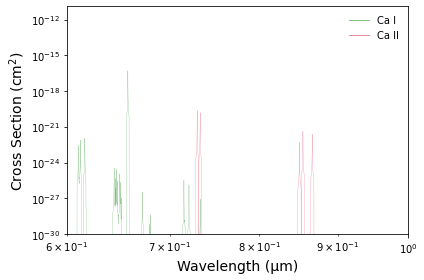

In [12]:
from excalibur.plot import plot_cross_section

'''Plot both cross sections on the same plot'''

plot_cross_section(collection = cross_sections, labels = ['Ca I', 'Ca II'], filename = 'Different_Ionization_States_of_Ca'
                   ,x_min = 0.6, x_max = 1.0)